# Mini Project 1: Exploratory Data Analysis
### Tom Waldin
Data retrieved from Waka Kotahi of crashes reported to them by the New Zealand Police from January 2000 to October 2022

## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
filename = 'Crash_Analysis_System_(CAS)_data.csv'
crashes_all_data = pd.read_csv(filename)
crashes_all_data.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1808645.0,5819854.0,1,NaN,527125.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
1,1569263.0,5177269.0,2,NaN,595000.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1392831.0,4908393.0,3,NaN,602000.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Heavy rain,Null
3,1394050.0,4916036.0,4,NaN,606210.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
4,1408373.0,4913799.0,5,NaN,604611.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


## Filter Data

In [4]:
crashes_all_data.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

In [35]:
crashes_all_data.dtypes

X                float64
Y                float64
OBJECTID           int64
advisorySpeed    float64
areaUnitID       float64
                  ...   
vanOrUtility     float64
vehicle          float64
waterRiver       float64
weatherA          object
weatherB          object
Length: 72, dtype: object


In [5]:
crashes = crashes_all_data[['crashSeverity', 'crashYear',
       'fatalCount', 'holiday',
       'light',
       'minorInjuryCount', 'region',
       'seriousInjuryCount', 'speedLimit',
       'urban','weatherA', 'weatherB']]

In [104]:
crashes.head()

,crashSeverity,crashYear,fatalCount,holiday,light,minorInjuryCount,region,seriousInjuryCount,speedLimit,urban,weatherA,weatherB
0,Minor Crash,2001,0.0,Christmas New Year,Overcast,1.0,Waikato Region,0.0,100.0,Open,Light rain,Null
1,Non-Injury Crash,2000,0.0,None,Bright sun,0.0,Canterbury Region,0.0,30.0,Urban,Fine,Null
2,Non-Injury Crash,2000,0.0,None,Bright sun,0.0,Otago Region,0.0,50.0,Urban,Heavy rain,Null
3,Non-Injury Crash,2000,0.0,None,Bright sun,0.0,Otago Region,0.0,50.0,Urban,Fine,Null
4,Non-Injury Crash,2000,0.0,None,Twilight,0.0,Otago Region,0.0,50.0,Urban,Fine,Null


## Clean Data

In [6]:
crashes.isna().sum()

crashSeverity              0
crashYear                  0
fatalCount               135
holiday               758016
light                      0
minorInjuryCount         135
region                  3144
seriousInjuryCount       135
speedLimit               715
urban                      0
weatherA                   0
weatherB                   0
dtype: int64

The null values in each column will be replaced as following:
    fatalCount: Fill with 0, as it is likely if no fatality was recorded there were none in the incident.
    holiday: Fill with 'None' to show the crash did not occur during any holiday period.
    minorInjuryCount: Fill with 0, as this is the median of the column.
    region: Fill with 'Auckland Region', as this is the mode of the column (mode used as data is not numeric).
    seriousInjuryCount: Fill with 0, as this is the median of the column.
    speedLimit: Fill with 50.0, as this is the median of the column.


In [81]:
clean_dict ={
    'fatalCount':0,
    'holiday':'None',
    'minorInjuryCount':0,
    'region':'Auckland Region',
    'seriousInjuryCount':0,
    'speedLimit':50.0
}

crashes = crashes.fillna(clean_dict)
crashes.isna().sum()

crashSeverity         0
crashYear             0
fatalCount            0
holiday               0
light                 0
minorInjuryCount      0
region                0
seriousInjuryCount    0
speedLimit            0
urban                 0
weatherA              0
weatherB              0
dtype: int64

## Perform Exploratory Data Analysis
I want to explore the trend of crashes over time and how crash severity relates to other variables such as speed limit and region.
### Trend Over Time

Text(0.5, 1.0, 'Number of Reported Crashes 2000-2022')

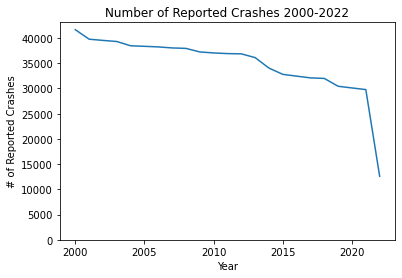

In [10]:
year_range = range(min(crashes['crashYear']), max(crashes['crashYear'])+1)
plt.plot(year_range, crashes['crashYear'].value_counts())
plt.xlabel('Year')
plt.ylabel('# of Reported Crashes')
plt.ylim(0,)
plt.title('Number of Reported Crashes 2000-2022')

The plot above demonstrates that the number of reported crashes is decreasing each year. This may be due to better driver education, safer roads, or another factor. it is noted that the value for 2022 should be discounted as there is not a full year of data available.

Text(0.5, 1.0, 'Number of Reported Fatalities 2000-2022')

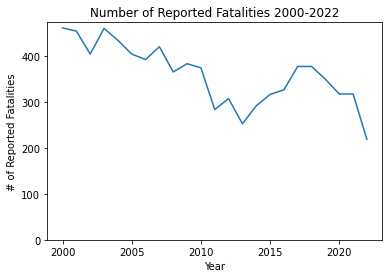

In [11]:
fatalities = []
for year in year_range:
    fatal_ea_year = sum(crashes[crashes['crashYear'] == year]['fatalCount'])
    fatalities.append(fatal_ea_year)
plt.plot(year_range, fatalities)
plt.xlabel('Year')
plt.ylabel('# of Reported Fatalities')
plt.ylim(0,)
plt.title('Number of Reported Fatalities 2000-2022')

The above plot shows that the number reported crashes that resulted in fatalities decreased between the year 2000 and 2013, then increased until 2017, decreasing again until 2021. Once again the 2022 data is not relevant in this plot.

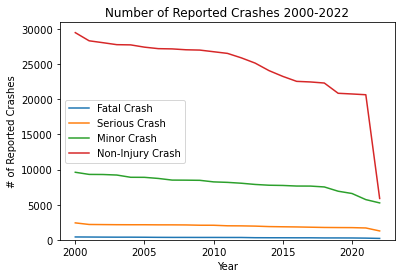

In [22]:
plt.plot(year_range, crashes[crashes['crashSeverity']=='Fatal Crash']['crashYear'].value_counts(), label='Fatal Crash')
plt.plot(year_range, crashes[crashes['crashSeverity']=='Serious Crash']['crashYear'].value_counts(), label='Serious Crash')
plt.plot(year_range, crashes[crashes['crashSeverity']=='Minor Crash']['crashYear'].value_counts(), label='Minor Crash')
plt.plot(year_range, crashes[crashes['crashSeverity']=='Non-Injury Crash']['crashYear'].value_counts(), label='Non-Injury Crash')
plt.xlabel('Year')
plt.ylabel('# of Reported Crashes')
plt.ylim(0,)
plt.title('Number of Reported Crashes 2000-2022')
plt.legend()

The scale of non-injury crashes flattens the others so normalised values may demonstrate the trend better. The 2022 data was removed for this normalisation.

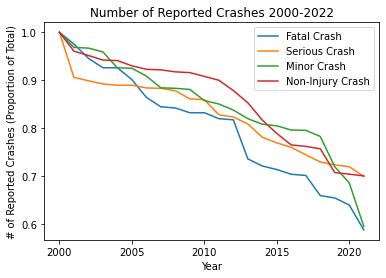

In [48]:
year_range = range(min(crashes['crashYear']), max(crashes['crashYear'])+1)
crashes = crashes[crashes['crashYear'] < 2022]

f = crashes[crashes['crashSeverity']=='Fatal Crash']['crashYear'].value_counts()
plt.plot(year_range, (f/max(f)), label='Fatal Crash')

s = crashes[crashes['crashSeverity']=='Serious Crash']['crashYear'].value_counts()
plt.plot(year_range, (s/max(s)), label='Serious Crash')

m = crashes[crashes['crashSeverity']=='Minor Crash']['crashYear'].value_counts()
plt.plot(year_range, (m/max(m)), label='Minor Crash')

ni = crashes[crashes['crashSeverity']=='Non-Injury Crash']['crashYear'].value_counts()
plt.plot(year_range, (ni/max(ni)), label='Non-Injury Crash')

plt.xlabel('Year')
plt.ylabel('# of Reported Crashes (Proportion of Total)')
#plt.ylim(0,)
plt.title('Number of Reported Crashes 2000-2022')
plt.legend()

The number of reported crashes of all catagories decreased every year. I chose to divide all values by their maximum value instaead of min-max normalisation so that I could see the rate of decrease proportional to the magnitude of the number of crashes. This allows me to comment on the rate of decrease. Interestingly the rate of decrease of fatal crashes is the greatest.

### Crash Severity Correlation

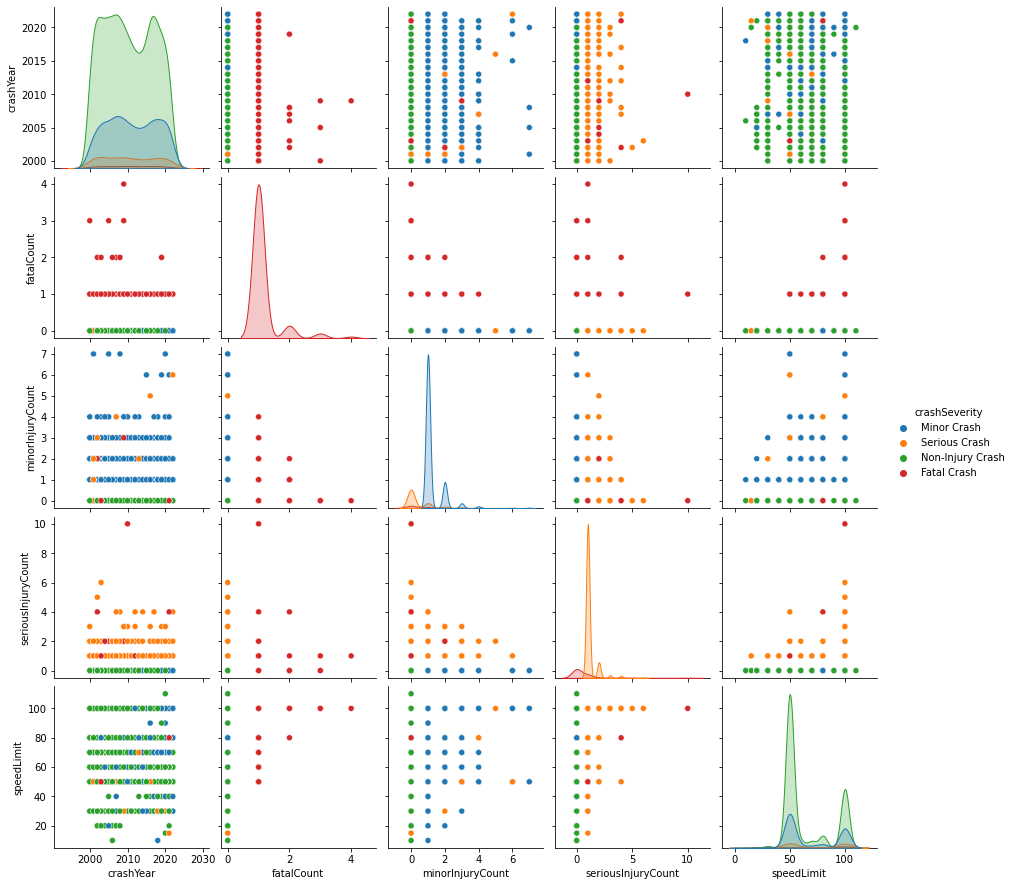

In [15]:
sns.pairplot(data=crashes.sample(10000), hue='crashSeverity')

In [31]:
crashes.corr()

,crashYear,fatalCount,minorInjuryCount,seriousInjuryCount,speedLimit
crashYear,1.000000,-0.008118,0.008066,-0.000270,0.029509
fatalCount,-0.008118,1.000000,0.028356,0.130294,0.083290
minorInjuryCount,0.008066,0.028356,1.000000,0.067253,0.102453
seriousInjuryCount,-0.000270,0.130294,0.067253,1.000000,0.103415
speedLimit,0.029509,0.083290,0.102453,0.103415,1.000000


The above plot does not offer much meaningful information other than offering some clarity as how the crash severity is classified. I wonder what the classification for Minor vs Serious is?

I want to know the relationship between the different variables and the number of crashes, and how that differs with crash severity. I believe the best way to do this is through a series of bar graphs, plotting the number of crashes associated with different catagories and a different set of plots for each crash severity. This will be for all data, irrespective of when the crash occurred.

### Speed Limit

In [74]:
#creating seperate dataframe for each crash severity
fatal_crashes = crashes[crashes['crashSeverity']=='Fatal Crash']
serious_crashes = crashes[crashes['crashSeverity']=='Serious Crash']
minor_crashes = crashes[crashes['crashSeverity']=='Minor Crash']
non_injury_crashes = crashes[crashes['crashSeverity']=='Non-Injury Crash']

Text(0.5, 1.0, 'Non-Injury Crashes')

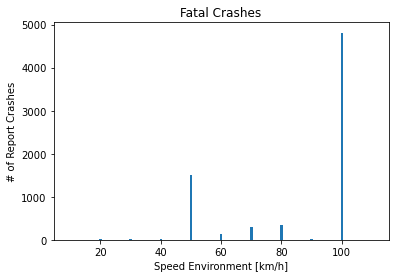

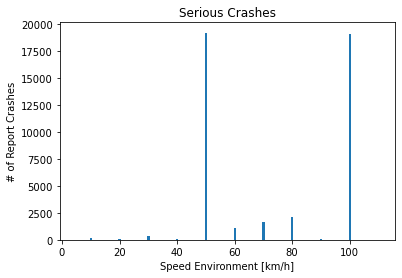

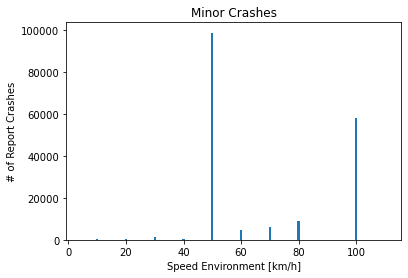

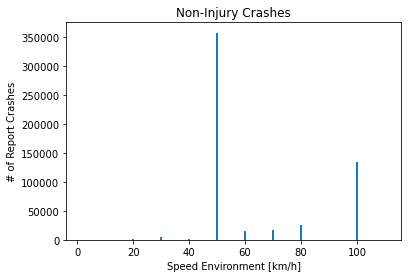

In [75]:
plt.figure(1)
x_labels = fatal_crashes['speedLimit'].value_counts().index
n_crashes = fatal_crashes['speedLimit'].value_counts()
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xlabel('Speed Environment [km/h]')
plt.title('Fatal Crashes')

plt.figure(2)
x_labels = serious_crashes['speedLimit'].value_counts().index
n_crashes = serious_crashes['speedLimit'].value_counts()
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xlabel('Speed Environment [km/h]')
plt.title('Serious Crashes')

plt.figure(3)
x_labels = minor_crashes['speedLimit'].value_counts().index
n_crashes = minor_crashes['speedLimit'].value_counts()
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xlabel('Speed Environment [km/h]')
plt.title('Minor Crashes')

plt.figure(4)
x_labels = non_injury_crashes['speedLimit'].value_counts().index
n_crashes = non_injury_crashes['speedLimit'].value_counts()
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xlabel('Speed Environment [km/h]')
plt.title('Non-Injury Crashes')

These plots demostrate that crashes tend to be more severe in areas with a 100 km/h speed limit than in areas with a 50km/h speed limit. Speed limits other than 50 and 100 are not common so it is not clear if these demonstrate a similar trend at this scale.

### Urban vs Rural

Text(0.5, 1.0, 'Non-Injury Crashes')

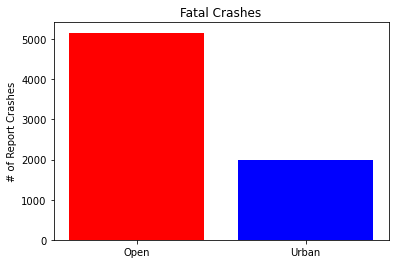

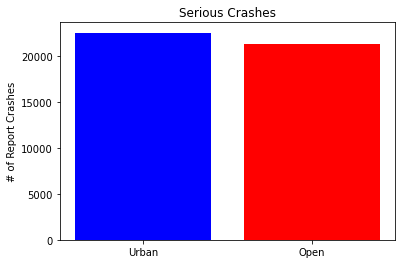

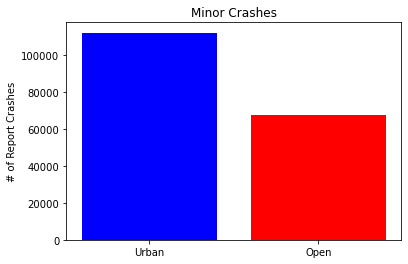

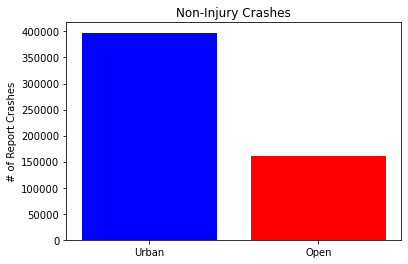

In [85]:
plt.figure(1)
x_labels = fatal_crashes['urban'].value_counts().index
n_crashes = fatal_crashes['urban'].value_counts()
color = ['b', 'r']
plt.bar(x_labels, n_crashes, color=['r', 'b'])
plt.ylabel('# of Reported Crashes')
plt.title('Fatal Crashes')

plt.figure(2)
x_labels = serious_crashes['urban'].value_counts().index
n_crashes = serious_crashes['urban'].value_counts()
plt.bar(x_labels, n_crashes, color=color)
plt.ylabel('# of Reported Crashes')
plt.title('Serious Crashes')

plt.figure(3)
x_labels = minor_crashes['urban'].value_counts().index
n_crashes = minor_crashes['urban'].value_counts()
plt.bar(x_labels, n_crashes, color=color)
plt.ylabel('# of Reported Crashes')
plt.title('Minor Crashes')

plt.figure(4)
x_labels = non_injury_crashes['urban'].value_counts().index
n_crashes = non_injury_crashes['urban'].value_counts()
plt.bar(x_labels, n_crashes, color=color)
plt.ylabel('# of Reported Crashes')
plt.title('Non-Injury Crashes')

As expected, makes sense with the speed limit results

### Region

Text(0.5, 1.0, 'Non-Injury Crashes')

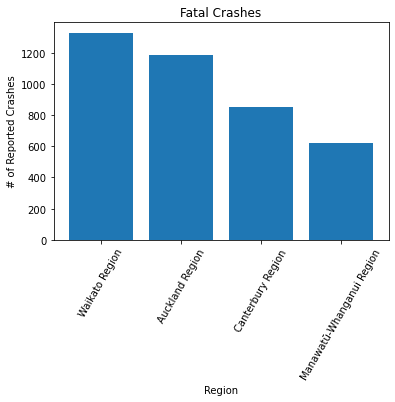

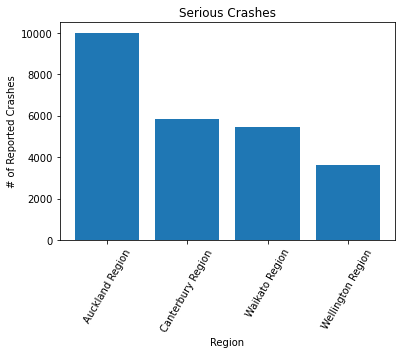

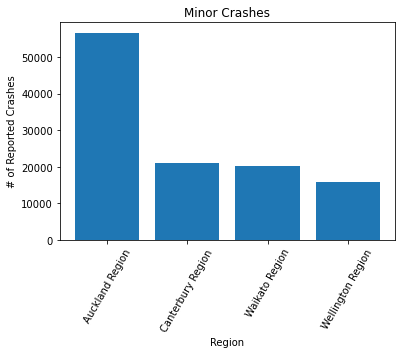

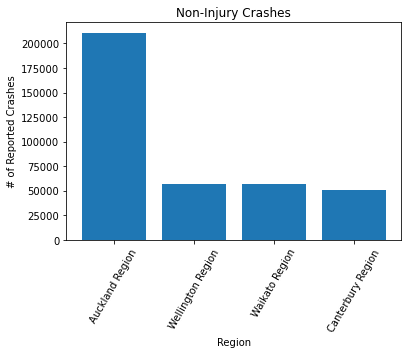

In [113]:
plt.figure(1)
x_labels = fatal_crashes['region'].value_counts().head(4).index
n_crashes = fatal_crashes['region'].value_counts().head(4)
plt.bar(x_labels, n_crashes)
plt.xticks(rotation = 60)
plt.ylabel('# of Reported Crashes')
plt.xlabel('Region')
plt.title('Fatal Crashes')

plt.figure(2)
x_labels = serious_crashes['region'].value_counts().head(4).index
n_crashes = serious_crashes['region'].value_counts().head(4)
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xticks(rotation = 60)
plt.xlabel('Region')
plt.title('Serious Crashes')

plt.figure(3)
x_labels = minor_crashes['region'].value_counts().head(4).index
n_crashes = minor_crashes['region'].value_counts().head(4)
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xticks(rotation = 60)
plt.xlabel('Region')
plt.title('Minor Crashes')

plt.figure(4)
x_labels = non_injury_crashes['region'].value_counts().head(4).index
n_crashes = non_injury_crashes['region'].value_counts().head(4)
plt.bar(x_labels, n_crashes)
plt.ylabel('# of Reported Crashes')
plt.xticks(rotation = 60)
plt.xlabel('Region')
plt.title('Non-Injury Crashes')

In [91]:
crashes['region'].value_counts()

Auckland Region              278535
Waikato Region                83811
Canterbury Region             78955
Wellington Region             76806
Bay of Plenty Region          45071
Manawatū-Whanganui Region     44022
Otago Region                  42958
Northland Region              31705
Hawke's Bay Region            30957
Southland Region              19491
Taranaki Region               17774
Gisborne Region                9320
Marlborough Region             7962
Nelson Region                  7785
Tasman Region                  7221
West Coast Region              6938
Name: region, dtype: int64

Dispite being the most populus region, more fatalities occur in the Waikato Region, and dispropotionately high fatalities in the Canterbury and Manawatu-Whanganui.
These regions have a lot of farmland and a lot of open road, so that may be a reason for this discrepancy. Serious, Minor, and Non-injury crashes occured the most in the Auckland Region, which is to be expected as it has the highest population.

Text(0.5, 1.0, 'Population of Regions')

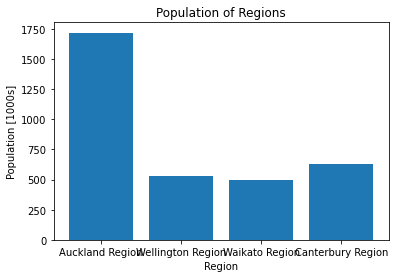

In [108]:
pop = [1718, 528, 497, 629]
plt.bar(x_labels, pop)
plt.ylabel('Population [1000s]')
plt.xlabel('Region')
plt.title('Population of Regions')

## Conclusion

It appears that the trend over time is that crashes are decreasing, and fatalities also appears to be trending downwards, but has broken away from that trend in the past 5 years. It appears that crash severity is correlated with the speed environment, with more severe crashes occuring in higher speed environments. This correlation is also present in urban vs open comparison, the open road having more severe crashes. This is reflected in regions with less urban areas tend to have more severe crashes.